# **MACHINE LEARNING LAB - 5**

# **Problem Statement : Performing handwritten digit classification using logistic regression**


**Import Libraries**

In [ ]:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score 
import warnings 
warnings.filterwarnings("ignore")

**Load the data**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] ='/content' 

In [ ]:
!kaggle competitions download -c digit-recognizer 

 85% 13.0M/15.3M [00:00<00:00, 135MB/s]
100% 15.3M/15.3M [00:00<00:00, 149MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv("train.csv") 
df.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df.drop('label', axis=1).values 
y = df['label'].values 

**Splitting data into Train and test sets with Stratified Sampling using train_test_split()**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 45) 

**Data Preprocessing using column standardisation. Use sklearn.preprocessing.StandardScaler().**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [ ]:
parameters = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=4, verbose=2, return_train_score=True)
grid.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END .............................................C=0.01; total time=  17.9s
[CV] END .............................................C=0.01; total time=  18.4s
[CV] END .............................................C=0.01; total time=  18.2s
[CV] END .............................................C=0.01; total time=  17.9s
[CV] END ..............................................C=0.1; total time=  17.8s
[CV] END ..............................................C=0.1; total time=  19.0s
[CV] END ..............................................C=0.1; total time=  17.6s
[CV] END ..............................................C=0.1; total time=  17.2s
[CV] END ................................................C=1; total time=  17.5s
[CV] END ................................................C=1; total time=  17.1s
[CV] END ................................................C=1; total time=  17.4s
[CV] END ........................................

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]}, return_train_score=True,
             verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([18.068542  , 17.86209863, 17.43178648, 17.24343979]),
 'std_fit_time': array([0.23357626, 0.66675618, 0.22704744, 0.17924156]),
 'mean_score_time': array([0.02820987, 0.02929819, 0.02773893, 0.02954811]),
 'std_score_time': array([0.00077191, 0.00130739, 0.00049517, 0.00370189]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.91928571, 0.91333333, 0.90166667, 0.89559524]),
 'split1_test_score': array([0.92035714, 0.91321429, 0.90083333, 0.89642857]),
 'split2_test_score': array([0.91821429, 0.90880952, 0.89547619, 0.88869048]),
 'split3_test_score': array([0.92047619, 0.91166667, 0.89880952, 0.8925    ]),
 'mean_test_score': array([0.91958333, 0.91175595, 0.89919643, 0.89330357]),
 'std_test_score': array([0.00091636, 0.00182375, 0.00238597, 0.00303907]),
 'rank_test_sco

**Plotting Graphs CV-accuracy vs Hyperparameters**

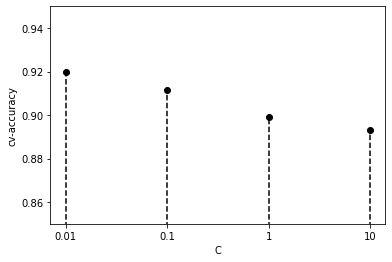

In [ ]:
C_vals = [str(x) for x in parameters['C']]

plt.xlabel("C")
plt.ylabel("cv-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_test_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_test_score'], linestyle="dashed")
plt.ylim(0.85,.95)
plt.xticks(C_vals)
plt.show()

**Plotting Graphs train-accuracy vs Hyperparameters**

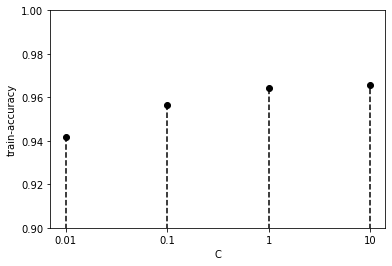

In [ ]:
plt.xlabel("C")
plt.ylabel("train-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_train_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_train_score'], linestyle="dashed")
plt.ylim(0.9,1.00)
plt.xticks(C_vals)
plt.show()

In [ ]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 0.01}
Best score: 0.9195833333333334


In [ ]:
for c in parameters['C']:
    model = LogisticRegression(C=c)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(c, accuracy_score(y_test, y_pred))

0.01 0.9180952380952381
0.1 0.9147619047619048
1 0.9079761904761905
10 0.9044047619047619
